In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
df = pd.read_csv("foreclosures.csv", index_col=False, thousands=',')

In [14]:
df.head()

,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
0,Allegheny Center,3,933,675,1052,51.5%,48.5%,535,10.1%,89.9%,...,1.3%,"$86,500","$109,535","$136,300",24.4%,NaN,0,0,0,0.0%
1,Allegheny West,3,462,390,355,74.9%,25.1%,203,18.2%,81.8%,...,57.4%,"$159,700","$202,228","$123,600",-38.9%,"$309,940",7,0,1,0.3%
2,Allentown,6,2500,1505,1291,80.0%,20.0%,953,59.2%,40.8%,...,62.9%,"$34,300","$43,434","$42,200",-2.8%,"$8,500",70,27,11,0.9%
3,Arlington,7,1869,880,886,86.6%,13.4%,754,65.4%,34.6%,...,72.3%,"$38,800","$49,132","$44,200",-10.0%,"$15,397",34,12,13,1.5%
4,Arlington Heights,7,244,557,148,91.2%,8.8%,139,18.7%,81.3%,...,9.2%,"$45,000","$56,984","$64,400",13.0%,NaN,0,0,0,0.0%


## Submetric 1: Number of foreclosures

The first submetric is to look at the number of foreclosures in each neighborhood. The less foreclosures the better.

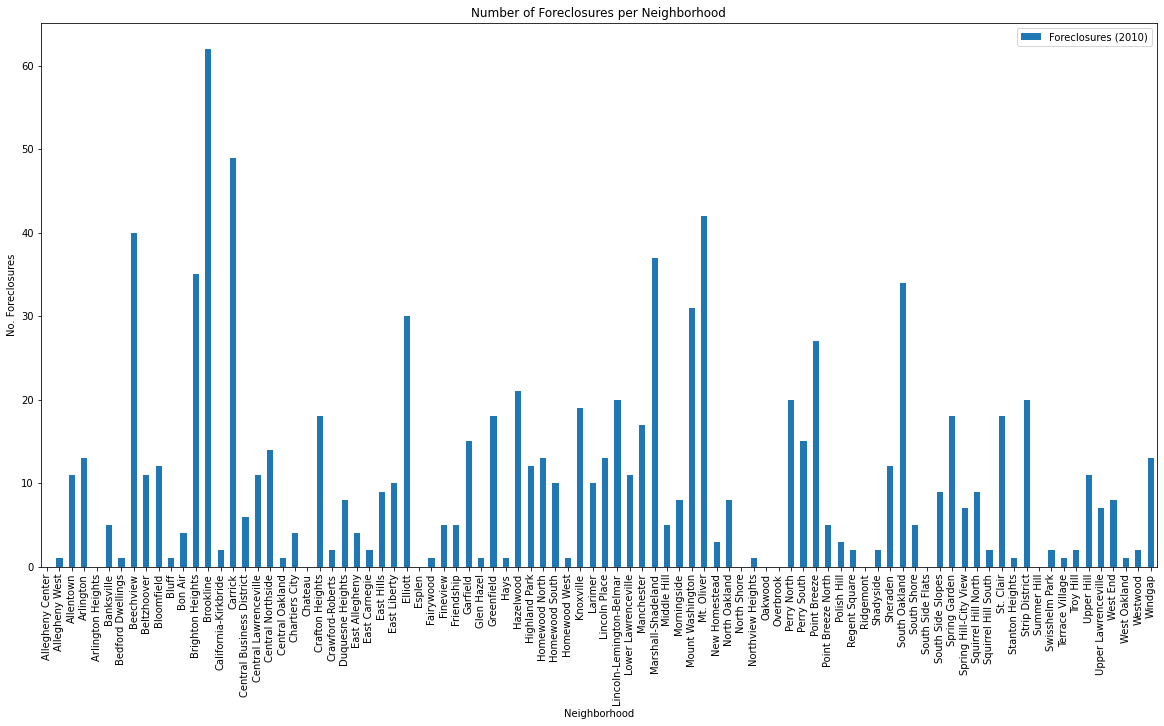

In [15]:
df[['Neighborhood', 'Foreclosures (2010)']].plot(x='Neighborhood', kind='bar', figsize=(20, 10), title="Number of Foreclosures per Neighborhood", ylabel="No. Foreclosures")

In [16]:
# get a sorted list of neighborhoods by number of foreclosures
df[['Neighborhood', 'Foreclosures (2010)']].sort_values('Foreclosures (2010)')

,Neighborhood,Foreclosures (2010)
0,Allegheny Center,0
30,Esplen,0
71,South Side Flats,0
4,Arlington Heights,0
56,North Shore,0
...,...,...
49,Marshall-Shadeland,37
7,Beechview,40
53,Mt. Oliver,42
15,Carrick,49


According to the foreclosure submetric, the five best neighborhoods are Allegheny Center, Esplen, South Side Flats, Arlington Heights, and North Shore. However, this submetric is likely flawed since it fails to take into account population density. It would make sense that neighborhoods with less population and less homes would be more likely to have less foreclosures than neighborhoods with higher populations.

## Submetric 2: Foreclosures per House

This next submetric takes into account the population of each neighborhood when counting foreclosues. Rather than just comparing the unscaled number of foreclosures, this metric takes into account the population of each neighborhood, giving a much more accurate measurement.

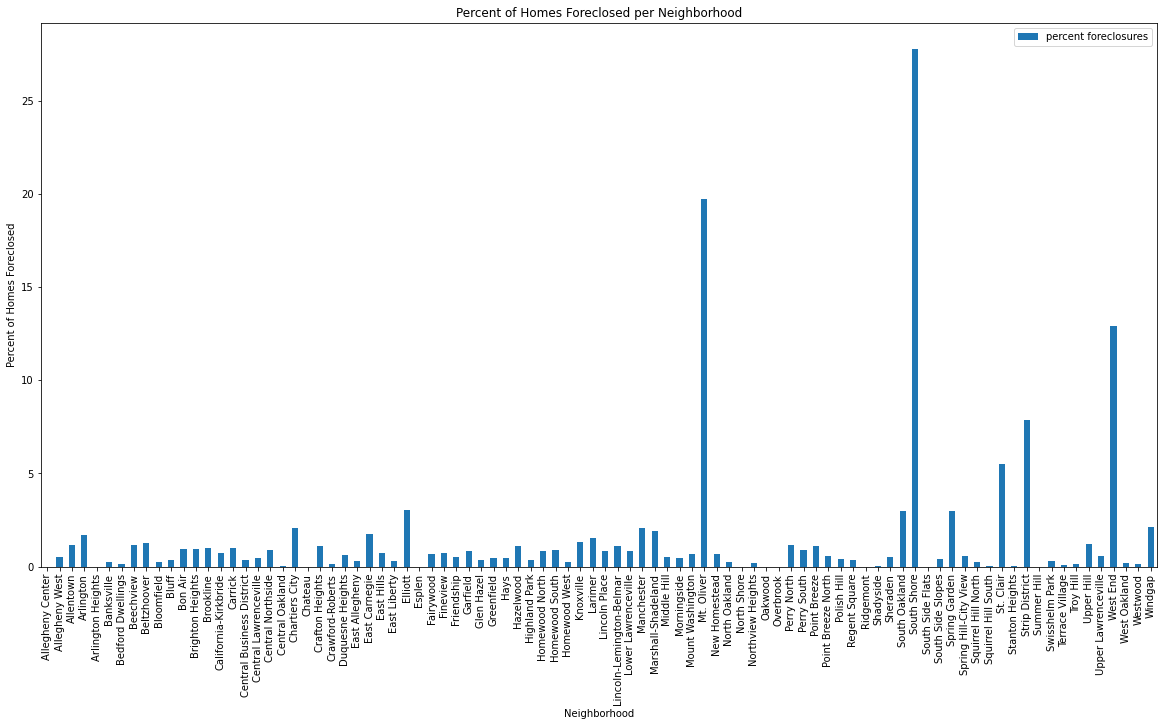

In [17]:
df['percent foreclosures'] = (df['Foreclosures (2010)'] / df['# Occupied Units (2010)']) * 100.0
df[['Neighborhood', 'percent foreclosures']].plot(kind='bar', figsize=(20, 10), x='Neighborhood', title="Percent of Homes Foreclosed per Neighborhood", ylabel="Percent of Homes Foreclosed")

In [18]:
df[['Neighborhood', 'percent foreclosures']].sort_values('percent foreclosures')

,Neighborhood,percent foreclosures
0,Allegheny Center,0.000000
30,Esplen,0.000000
80,Summer Hill,0.000000
56,North Shore,0.000000
21,Chateau,0.000000
...,...,...
77,St. Clair,5.487805
79,Strip District,7.874016
86,West End,12.903226
53,Mt. Oliver,19.718310


After comparing the number of foreclosures to the number of housing units in each neighborhood, the metric gave pretty much the same results. Since there were a number of ties between neighborhoods with 0% foreclosure rate, a tie breaker was needed.

In order to break the tie, another metric was needed. For that, I chose the neighborhood with the highest population. This makes sense since a low foreclosure rate among a high population means more people are financially stable than a low foreclosure rate with a low population. 

In [27]:
df[df['Foreclosures (2010)'] == 0.0].sort_values('Population (2010)', ascending=False)

,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),...,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010),percent foreclosures
71,South Side Flats,7,6597,3613,4326,87.3%,12.7%,3921,43.3%,56.7%,...,"$77,100","$97,632","$153,750",57.5%,"$174,500",158,18,0,0.0%,0.0
59,Overbrook,5,3644,1726,1706,92.9%,7.1%,1700,88.2%,11.8%,...,"$61,850","$78,321","$76,200",-2.7%,"$63,150",64,18,0,0.0%,0.0
80,Summer Hill,1,1051,551,510,94.3%,5.7%,539,64.7%,35.3%,...,"$76,100","$96,365","$94,400",-2.0%,"$67,500",21,6,0,0.0%,0.0
58,Oakwood,4,1027,551,571,95.4%,4.6%,575,43.8%,56.2%,...,"$74,500","$94,339","$108,500",15.0%,"$105,000",9,0,0,0.0%,0.0
0,Allegheny Center,3,933,675,1052,51.5%,48.5%,535,10.1%,89.9%,...,"$86,500","$109,535","$136,300",24.4%,NaN,0,0,0,0.0%,0.0
66,Ridgemont,4,483,233,218,95.9%,4.1%,257,76.3%,23.7%,...,"$70,300","$89,021","$90,500",1.7%,"$52,000",9,5,0,0.0%,0.0
56,North Shore,16,303,251,241,85.5%,14.5%,183,0.0%,100.0%,...,"$20,000","$25,326",NaN,NaN,"$19,524,500",2,0,0,0.0%,0.0
30,Esplen,4,301,231,166,78.9%,21.1%,137,62.8%,37.2%,...,"$31,000","$39,255","$51,400",30.9%,"$7,750",4,6,0,0.0%,0.0
4,Arlington Heights,7,244,557,148,91.2%,8.8%,139,18.7%,81.3%,...,"$45,000","$56,984","$64,400",13.0%,NaN,0,0,0,0.0%,0.0
21,Chateau,3,11,29,4,100.0%,0.0%,28,0.0%,100.0%,...,NaN,NaN,NaN,NaN,"$250,000",1,9,0,0.0%,0.0


Here, we can clearly see that the neighborhood with the highest population while maintaining no foreclosures is South Side Flats. Therefore, my conclusion is that South Sides Flats is the best neighborhood.